In [22]:
from utils import assertEquals

In [23]:
assertEquals(3, 3)

In [24]:
assertEquals(3, 4)

FAILED!!! expect (3), but actual (4)


In [25]:
assertEquals(3.0001, 3.0002)

In [1]:
import tensorflow as tf

In [7]:
x = tf.add(3, 4)

In [10]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter('./graphs', sess.graph)
    print(sess.run(x))
writer.close()

7


In [2]:
import pydot
from itertools import chain
def tf_graph_to_dot(in_graph):
    dot = pydot.Dot()
    dot.set('rankdir', 'LR')
    dot.set('concentrate', True)
    dot.set_node_defaults(shape='record')
    all_ops = in_graph.get_operations()
    all_tens_dict = {k: i for i,k in enumerate(set(chain(*[c_op.outputs for c_op in all_ops])))}
    for c_node in all_tens_dict.keys():
        node = pydot.Node(c_node.name)#, label=label)
        dot.add_node(node)
    for c_op in all_ops:
        for c_output in c_op.outputs:
            for c_input in c_op.inputs:
                dot.add_edge(pydot.Edge(c_input.name, c_output.name))
    return dot

In [3]:
from IPython.display import SVG

In [8]:
with tf.Session() as sess:
    tf_graph_to_dot(sess.graph).write_svg('simple_tf.svg')


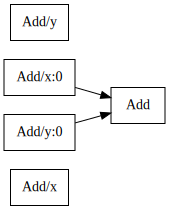

In [9]:
SVG('simple_tf.svg')

In [13]:
import numpy as np
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))


In [14]:
show_graph(tf.get_default_graph().as_graph_def())